## Ejemplo básico de una red neuronal para clasificación de imágenes

## Importación de las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Carga de los datos
Vamos a utilizar el propio dataset que viene precargado en Keras:
https://keras.io/api/datasets/fashion_mnist/

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Exploración y visualización de los datos
Utilizamos len, shape, e imshow para explorar y ver con qué estamos trabajando
Pistas: adimensionalizar las imágenes (intensidad de tono de pixel) y crear una lista con los nombres de las clases.

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

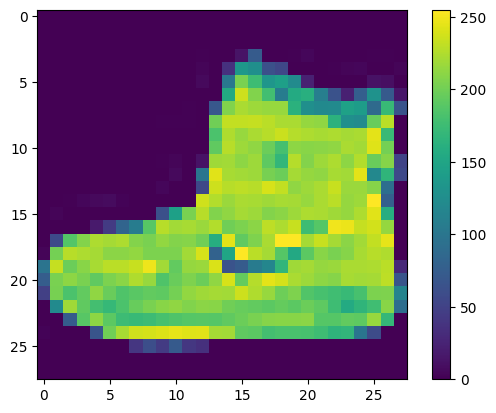

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

In [13]:
class_names[train_labels[0]]

'Ankle boot'

In [14]:
train_images = train_images/255.0
test_images = test_images/255.0

<function matplotlib.pyplot.show(close=None, block=None)>

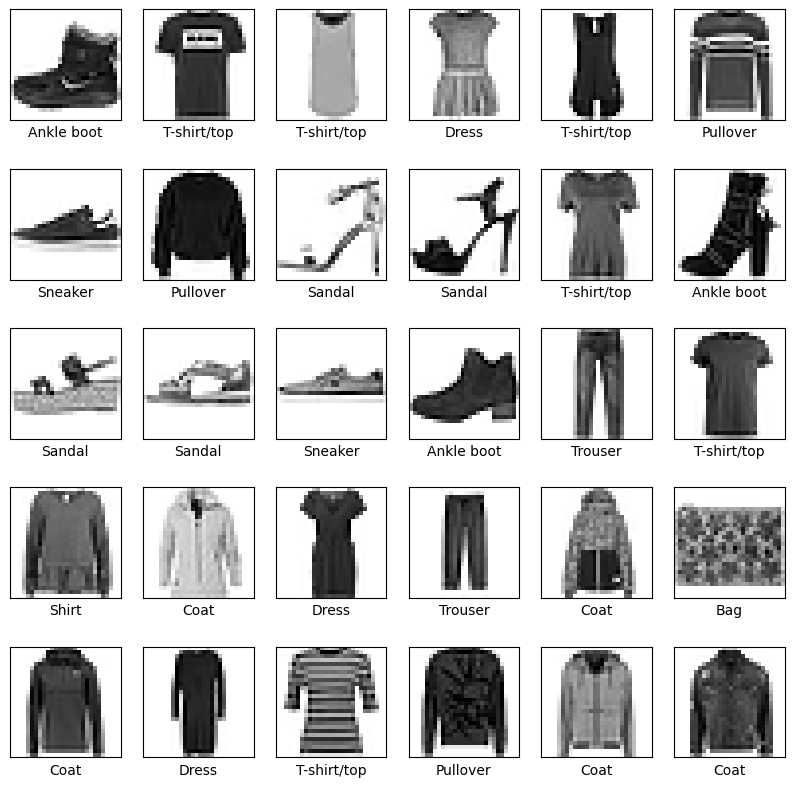

In [16]:
plt.figure(figsize=(10,10))
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

# El método show no es necesario en colab
plt.show

## Construcción del modelo
Llamamos a la clase Sequential y usamos layers para crear las capas. Con Dense, se crean las capas de red neuronal. Utilizaremos las funciones de activación ReLu en las capas internas y Softmax en la de salida.

Pista: Flatten crea una capa que reduce a 1 la dimensión del array de las imágenes

In [ ]:
model = keras.Sequential([





])

## Parámetros del entrenamiento
El método compile nos permite configurar el optimizador, función de coste,etc. En este caso, vamos a recurrir al optimizador Adam, y la función de coste sparse_categorical_crossentropy.

In [ ]:
model.compile(optimizer= 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamiento del modelo
Utilizamos la función fit para el entrenamiento de la DNN. Tenemos que pasar como argumentos los valores de entrada, los de salida (las etiquetas) y el número de iteraciones o epochs.

In [ ]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5020 - accuracy: 0.8227
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3759 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3404 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3133 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2976 - accuracy: 0.8902


## Evaluación del modelo
Para evaluar el modelo, recurrimos a la función evaluate y guardamos los valores que nos devuelve, el error o loss, y la precisión o accuracy.

In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels)

print('Test accuracy: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8694
Test accuracy:  0.8694000244140625


## Generación del modelo predictivo y pruebas
Con la función predict, generamos la colección de resultados del modelo para nuevos datos de entrada, y podemos analizar su comportamiento.

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [ ]:
predictions[5]

array([8.28828997e-05, 9.99911249e-01, 2.90110574e-06, 1.16974434e-07,
       1.78586242e-06, 8.30333523e-13, 9.74073828e-07, 4.15693140e-11,
       1.89980010e-09, 3.96592863e-11], dtype=float32)

In [ ]:
np.argmax(predictions[5])

1

In [ ]:
class_names[1]

'Trouser'

In [ ]:
class_names[test_labels[5]]

'Trouser'

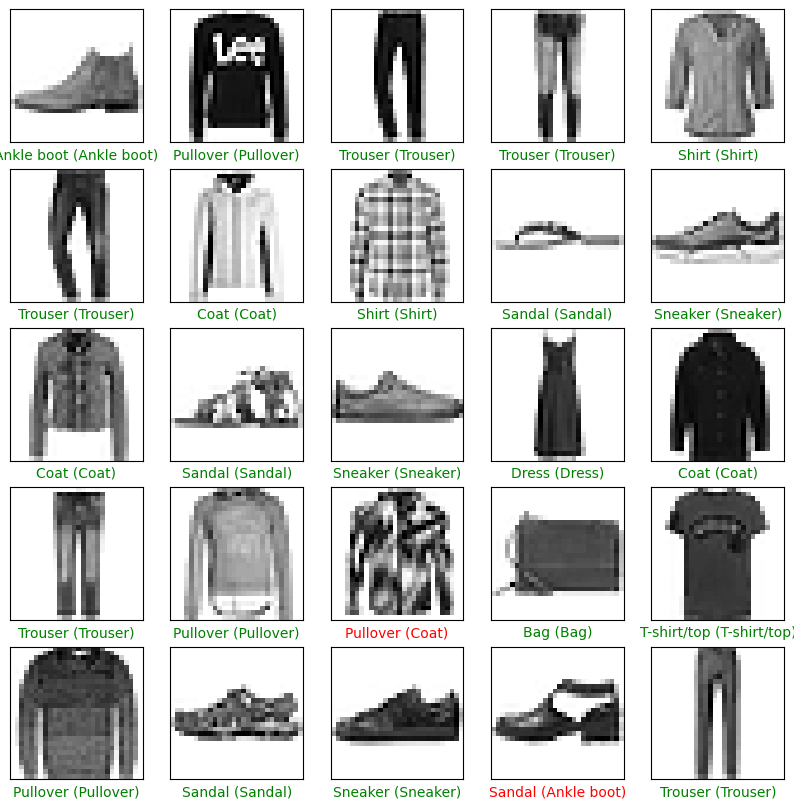

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[i],cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} ({})".format(class_names[predicted_label],
                              class_names[true_label]),
                              color=color)

In [ ]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.